<a href="https://colab.research.google.com/github/atfan7/Hypothesis-Testing--Probability-and-Statistics-Projects/blob/main/ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANOVA/Kruskal-Wallis test/ QQ plot/ Shapiro test /Levene

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway, f

from scipy.stats import ttest_ind

from statsmodels.graphics.gofplots import qqplot  #probplot
from scipy.stats import shapiro

from scipy.stats import levene

from scipy.stats import kruskal

In [8]:
#Aerofit

In [9]:
from google.colab import files
data=files.upload()


Saving aerofit.csv to aerofit (1).csv


In [10]:


df_aerofit = pd.read_csv("aerofit.csv")

In [11]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [12]:
df_aerofit["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

<Axes: xlabel='Product', ylabel='Income'>

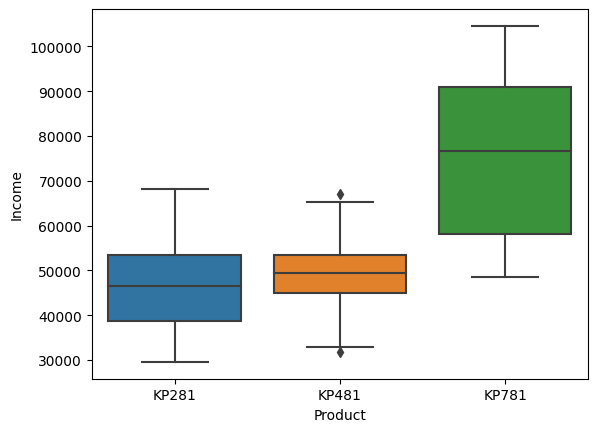

In [13]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

In [14]:
df_aerofit

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [15]:
df_aerofit["random_group"] = np.random.choice(
    ["g1", "g2", "g3"],
    size=len(df_aerofit)
)

In [16]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,random_group
0,KP281,18,Male,14,Single,3,4,29562,112,g2
1,KP281,19,Male,15,Single,2,3,31836,75,g1
2,KP281,19,Female,14,Partnered,4,3,30699,66,g3
3,KP281,19,Male,12,Single,3,3,32973,85,g2
4,KP281,20,Male,13,Partnered,4,2,35247,47,g1


<Axes: xlabel='random_group', ylabel='Income'>

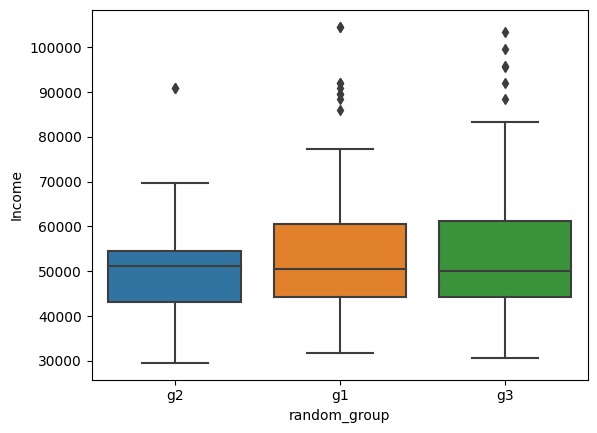

In [17]:
sns.boxplot(x='random_group', y='Income', data=df_aerofit)

In [18]:
income_g1 = df_aerofit[df_aerofit["random_group"]=="g1"]["Income"]
income_g2 = df_aerofit[df_aerofit["random_group"]=="g2"]["Income"]
income_g3 = df_aerofit[df_aerofit["random_group"]=="g3"]["Income"]

In [19]:
income_g1.mean()

55356.078125

In [20]:
income_g2.mean()

50501.6037735849

In [21]:
income_g3.mean()

54764.28571428572

In [22]:
f_oneway(income_g1, income_g2, income_g3)

F_onewayResult(statistic=1.4552147520944743, pvalue=0.23612825148007813)

In [23]:
# H0: All groups have same mean
# Ha: One or more groups have different mean

In [24]:
f_stats, p_value = f_oneway(income_g1, income_g2, income_g3)

if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")
    print("All groups have same mean")


Fail to reject H0
All groups have same mean


<Axes: xlabel='Product', ylabel='Income'>

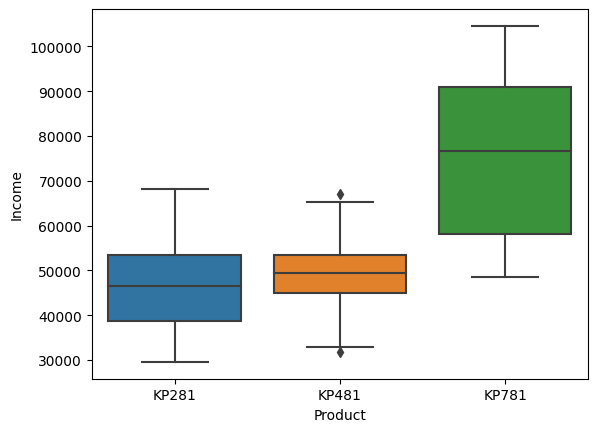

In [25]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

In [26]:
income_kp281 = df_aerofit[df_aerofit["Product"]=="KP281"]["Income"]
income_kp481 = df_aerofit[df_aerofit["Product"]=="KP481"]["Income"]
income_kp781 = df_aerofit[df_aerofit["Product"]=="KP781"]["Income"]

In [27]:
income_kp281.mean()

46418.025

In [28]:
income_kp481.mean()

48973.65

In [29]:
income_kp781.mean() #75K - difference is large

75441.575

In [30]:
f_oneway(income_kp281, income_kp481, income_kp781)

F_onewayResult(statistic=89.25903546601671, pvalue=1.5644991316342494e-27)

In [31]:
#T Test independent

In [32]:
# H0: Two means are same
t_stat, p_value = ttest_ind(income_kp481, income_kp781)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

7.770191623361236e-16
Reject H0


In [33]:
t_stat, p_value = ttest_ind(income_kp281, income_kp481)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.09487529747264932
Fail to reject H0


In [34]:
t_stat, p_value = ttest_ind(income_kp281, income_kp781)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

4.116508528877672e-21
Reject H0


In [35]:
#QQ Plot

In [38]:
from google.colab import files
data=files.upload()



Saving weight-height (1).csv to weight-height (1) (1).csv


In [42]:
df_hw = pd.read_csv("weight-height (1).csv")

In [43]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [44]:
height = df_hw["Height"]

<Axes: xlabel='Height', ylabel='Count'>

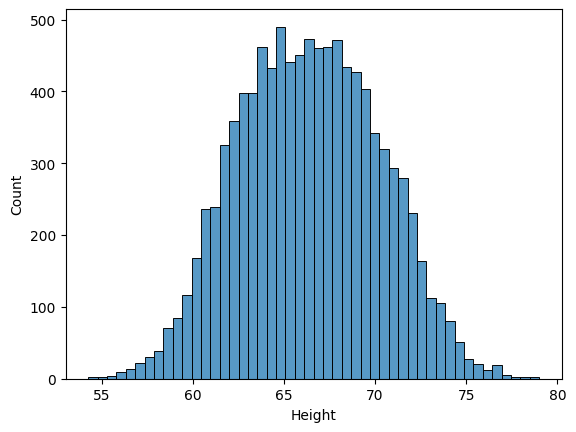

In [47]:
sns.histplot(height)

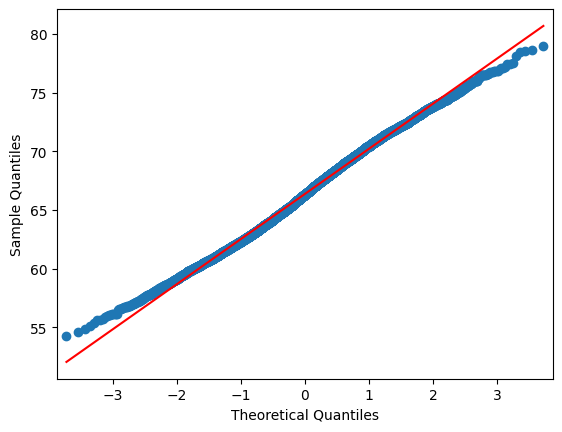

In [46]:
qqplot(height, line="s")
plt.show()

In [49]:
from google.colab import files
data=files.upload()

Saving waiting_time.csv to waiting_time.csv


In [50]:
df_wt = pd.read_csv("waiting_time.csv")

In [51]:
df_wt.head()

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439


<Axes: xlabel='time', ylabel='Count'>

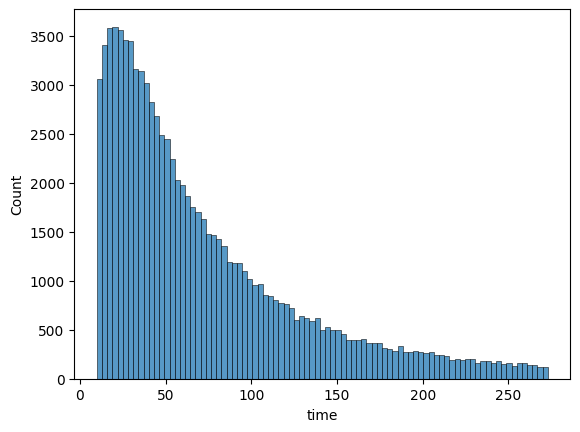

In [52]:
sns.histplot(df_wt["time"])

In [ ]:
qqplot(df_wt["time"], line="s")
plt.show()

In [71]:
#Shapiro - Number of samples should range between 50 and 200
#Test maynot work if the data is too large

In [54]:
height_subset = height.sample(100)

In [55]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(height_subset)
print(p_value)

0.29274293780326843


In [56]:
#Waiting time

In [57]:
df_wt_subset = df_wt.sample(50)["time"]

In [58]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(df_wt_subset)
print(p_value)

1.838783828134183e-05


<Axes: xlabel='Height', ylabel='Count'>

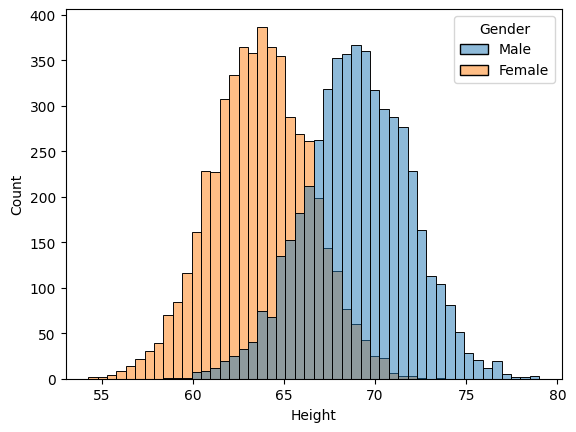

In [59]:
sns.histplot(data=df_hw, x="Height", hue="Gender")

In [60]:
height_men = df_hw[df_hw["Gender"]=="Male"]["Height"]
height_women = df_hw[df_hw["Gender"]=="Female"]["Height"]

In [61]:
height_men.mean()

69.02634590621741

In [62]:
height_women.mean()

63.70877360342507

In [63]:
ttest_ind(height_men, height_women)

TtestResult(statistic=95.60271449148823, pvalue=0.0, df=9998.0)

In [64]:
height_men.var()

8.198843252520467

In [65]:
height_women.var()

7.2699474936701245

In [66]:
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(height_men, height_women)
if p_value < 0.05:
    print("Variances are not equal")


Variances are not equal


In [67]:
#Kruskal Wallis

In [68]:
#Suppose we have monthly iPhone sales from three stores in a city: a, b, c.

#Test whether they have the same average sales

a = [25, 25, 27, 30, 23, 20]
b = [30, 30, 21, 24, 26, 28]
c = [18, 30, 29, 29, 24, 26]

In [69]:
kruskal(a, b, c)

KruskalResult(statistic=0.6794066317626576, pvalue=0.7119815250421468)

In [70]:
# Optional Post read - ANOVA implementation
#Suppose we have monthly iPhone sales from three stores in a city: a, b, c.

#Test whether they have the same average sales

a = [25, 25, 27, 30, 23, 20]
b = [30, 30, 21, 24, 26, 28]
c = [18, 30, 29, 29, 24, 26]

f_stat, p_value = f_oneway(a,b,c)
print(f_stat, p_value)

list_of_tuples = list(zip(a, b,c))
df = pd.DataFrame(list_of_tuples, columns = ['A', 'B', 'C'])
df

m1 = np.mean(a)
m2 = np.mean(b)
m3 = np.mean(c)

print('Average sales for A: {}'.format(m1))
print('Average sales for B: {}'.format(m2))
print('Average sales for C: {}'.format(m3))

m = (m1+m2+m3)/3
print('Overall mean: {}'.format(m))

SSb = 6*((m1-m)**2+(m2-m)**2+(m3-m)**2)
print('Between-groups Sum of Squared Differences: {}'.format(SSb))

MSb = SSb/2
print('Between-groups Mean Square value: {}'.format(MSb))

err_a = list(a-m1)
err_b = list(b-m2)
err_c = list(c-m3)
err = err_a+err_b+err_c
ssw = []
for i in err:
    ssw.append(i**2)

SSw = np.sum(ssw)

MSw = SSw/15
print('Within-group Mean Square value: {}'.format(MSw))

F = MSb/MSw
print('F-score: {}'.format(F))

1 - f.cdf(F, dfn=2, dfd=15)

f_stat, p_value = f_oneway(a,b,c)
print(f_stat, p_value)

# If assumptions of ANOVA don't hold, we need Kruskal Wallis
kruskal(a, b, c)

0.2348993288590604 0.793504662732833
Average sales for A: 25.0
Average sales for B: 26.5
Average sales for C: 26.0
Overall mean: 25.833333333333332
Between-groups Sum of Squared Differences: 6.999999999999999
Between-groups Mean Square value: 3.4999999999999996
Within-group Mean Square value: 14.9
F-score: 0.23489932885906037
0.2348993288590604 0.793504662732833


KruskalResult(statistic=0.6794066317626576, pvalue=0.7119815250421468)